In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
import pandas as pd
apple = pd.read_csv("APPLE.csv")
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,27-05-2014,21.995714,22.352142,21.986786,22.343929,19.842157,348866000
1,28-05-2014,22.357857,22.493929,22.277857,22.286072,19.790781,315481600
2,29-05-2014,22.423214,22.745358,22.420357,22.692142,20.151382,376474000
3,30-05-2014,22.785000,23.006071,22.460714,22.607143,20.075899,564020800
4,02-06-2014,22.641430,22.672501,22.232143,22.451786,19.937943,369350800
...,...,...,...,...,...,...,...
2335,05-09-2023,188.279999,189.979996,187.610001,189.699997,189.699997,45280000
2336,06-09-2023,188.399994,188.850006,181.470001,182.910004,182.910004,81755800
2337,07-09-2023,175.179993,178.210007,173.539993,177.559998,177.559998,112488800
2338,08-09-2023,178.350006,180.240005,177.789993,178.179993,178.179993,65551300


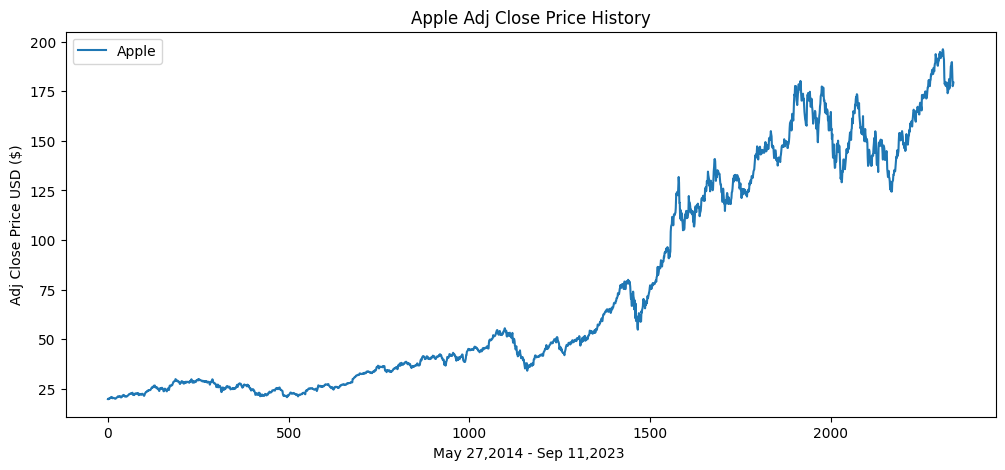

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - Sep 11,2023 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

In [6]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = apple['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2335,183.813544
2336,183.465248
2337,182.909325
2338,182.416677


In [7]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = apple['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2335,180.276126
2336,180.454142
2337,180.582149
2338,180.716157


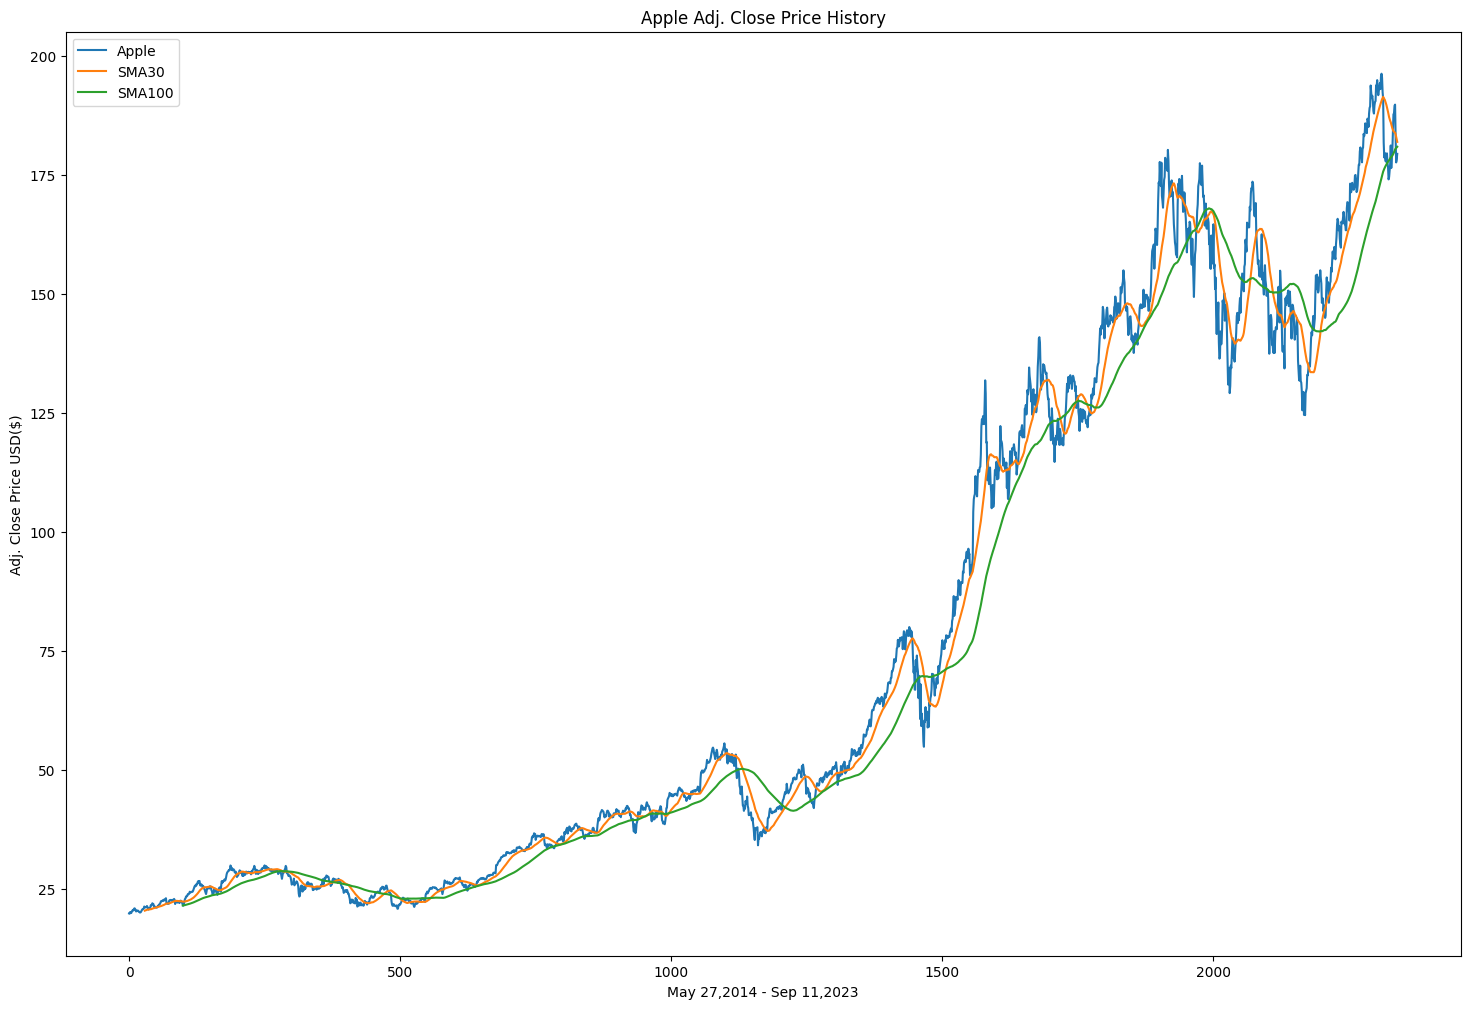

In [8]:
plt.figure(figsize=(18,12))
plt.plot(apple['Adj Close'], label='Apple')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - Sep 11,2023')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
data = pd.DataFrame()
data['apple'] = apple['Adj Close']
data['SMA30'] = sma30['Adj Close']
data['SMA100'] = sma100['Adj Close']
data

,apple,SMA30,SMA100
0,19.842157,NaN,NaN
1,19.790781,NaN,NaN
2,20.151382,NaN,NaN
3,20.075899,NaN,NaN
4,19.937943,NaN,NaN
...,...,...,...
2335,189.699997,183.813544,180.276126
2336,182.910004,183.465248,180.454142
2337,177.559998,182.909325,180.582149
2338,178.179993,182.416677,180.716157


In [10]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [12]:
import numpy as np
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
# To show the data
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,19.842157,NaN,NaN,NaN,NaN
1,19.790781,NaN,NaN,NaN,NaN
2,20.151382,NaN,NaN,NaN,NaN
3,20.075899,NaN,NaN,NaN,NaN
4,19.937943,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2335,189.699997,183.813544,180.276126,NaN,NaN
2336,182.910004,183.465248,180.454142,NaN,NaN
2337,177.559998,182.909325,180.582149,NaN,NaN
2338,178.179993,182.416677,180.716157,NaN,NaN


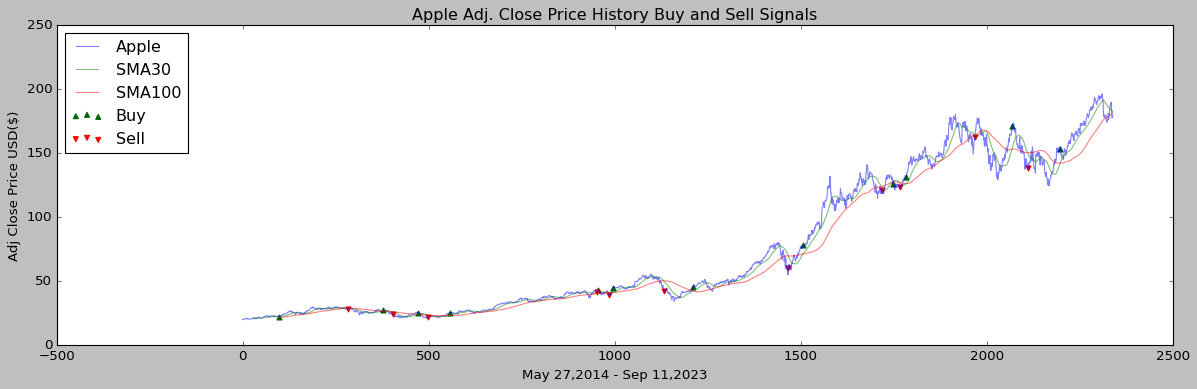

In [13]:
plt.style.use('classic')
plt.figure(figsize=(18,5))
plt.plot(data['apple'], label='Apple', alpha=0.50)
plt.plot(data['SMA30'], label='SMA30', alpha=0.50)
plt.plot(data['SMA100'],label='SMA100', alpha=0.50)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='darkgreen')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - Sep 11,2023")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()